In [1]:
#Importing all the required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import keras

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Loading cifar10
cifar10=keras.datasets.cifar10


In [3]:
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()

In [4]:
len(train_labels)

50000

In [5]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']


In [7]:
len(train_images)

50000

In [8]:
train_images.shape

(50000, 32, 32, 3)

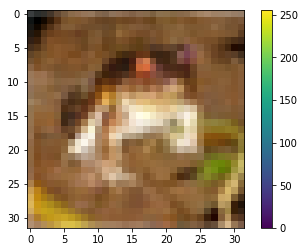

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [10]:
train_images=train_images/255.0

In [11]:
test_images=test_images/255.0

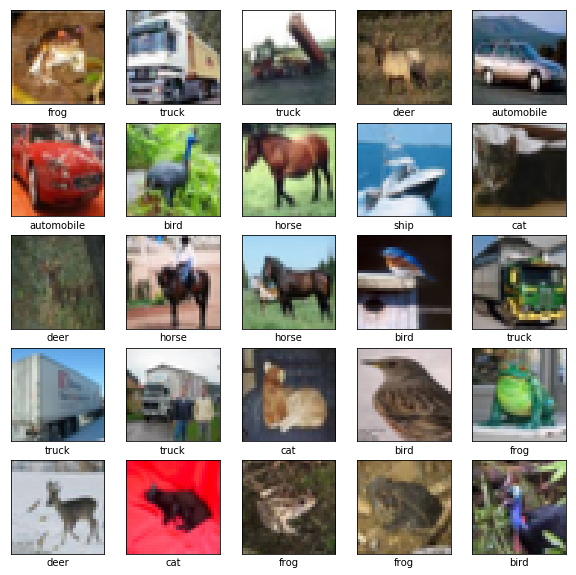

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [18]:
model.compile(optimizer=tf.train.AdamOptimizer(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(train_images,train_labels,epochs=50)

Epoch 1/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.5197 - acc: 0.4577
Epoch 2/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.5187 - acc: 0.4589
Epoch 3/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.5169 - acc: 0.4579
Epoch 4/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.5183 - acc: 0.4581
Epoch 5/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.5156 - acc: 0.4570
Epoch 6/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5118 - acc: 0.4624
Epoch 7/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.5133 - acc: 0.4600
Epoch 8/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.5126 - acc: 0.4595
Epoch 9/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.5117 - acc: 0.4605
Epoch 10/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.5080 - a

In [20]:
test_loss,test_accuracy=model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 106us/step


In [21]:
print test_accuracy

0.4281


In [22]:
predictions=model.predict(test_images)

In [25]:
predictions[100]

array([0.01884583, 0.00762031, 0.14201029, 0.16746593, 0.20564385,
       0.20094943, 0.04494129, 0.16503577, 0.01377673, 0.03371058],
      dtype=float32)

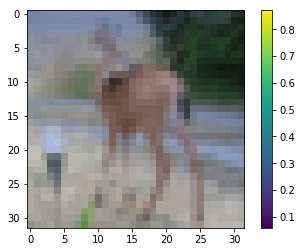

In [26]:
#confidence is more for 9th category..We will see by printing the image
plt.figure()
plt.imshow(test_images[100])
plt.colorbar()

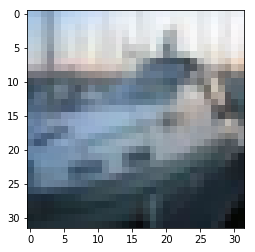

In [27]:
plt.figure()
plt.imshow(test_images[2],cmap=plt.cm.binary)
#plt.colorbar()

In [29]:
#3rd test image is trouser..Let's see what our model has predicted
predictions[2]

array([1.01181164e-01, 9.24076512e-02, 8.90533847e-04, 1.39244960e-03,
       2.39537330e-04, 1.41440169e-03, 1.13732331e-05, 2.91738048e-04,
       6.03118181e-01, 1.99052930e-01], dtype=float32)

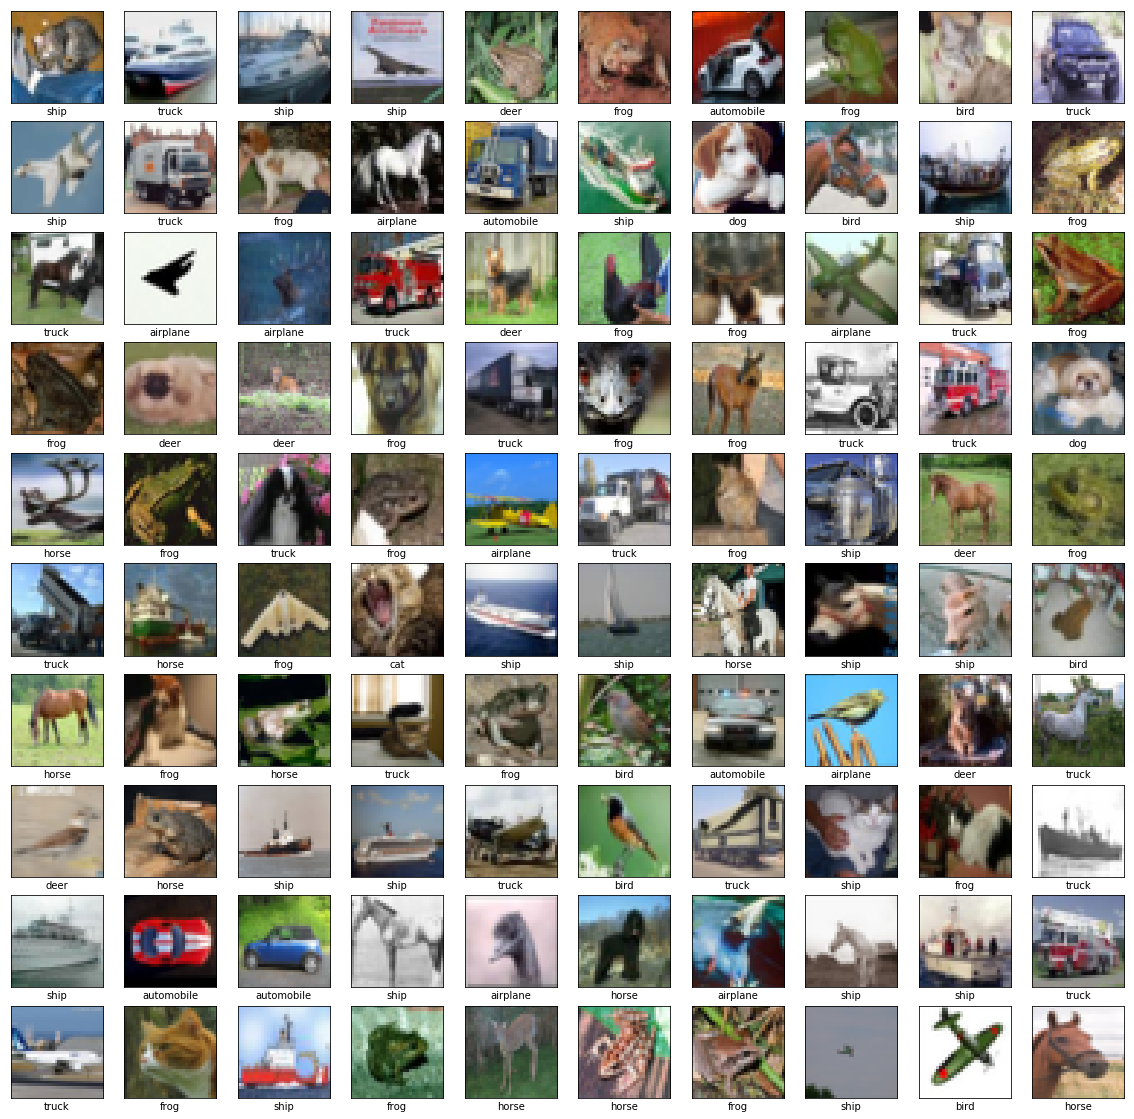

In [30]:
#Let's see the prediction results for first 100 test images
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions[i])])